# Project 1: Grad School Admission

Our goal will be to identify the various factors that may influence admission into graduate school. 

File called "admissions.csv" to be used. "Admissions.csv" contains four variables: admit, gre, gpa, rank.

- 'admit' is a binary variable and indicates whether or not a candidate was admitted; (admit =1) or not admit (admit= 0)
- 'gre' is GRE score
- 'gpa' stands for Grade Point Average
- 'rank' is the rank of an applicant's undergraduate alma mater, with 1 being the highest and 4 as the lowest


##### What is the outcome?

- Determine to what extent the given variables influence admission into graduate school

##### What are the predictors/covariates?

- Student's GRE score, student's GPA, and student's alma mater rank
- Target variable = 'admit' (whether student was admitted or not)

##### What timeframe is the data relevant for?

- The data timeframe is not included in: admissions.csv, Project 1 instructions, nor on "yhat"'s blog (although the blog is dated March 3, 2013).

##### What is the hypothesis?

- GRE, GPA, and Rank influence whether a person is admitted to graduate school

##### Data Dictionary:

            | Variable |         Description         | Variable Type |
            |----------|-----------------------------|---------------|
            |  admit   |       Target variable       | int64         |
            |   gre    |      Score on gre exam      | float64       |
            |   gpa    |     Grade point average     | float64       |
            |  rank    |        School's rank        | float64       |
            
            

### Exploratory Analysis Plan

##### 1. What are the goals of the exporatory analysis?

Identify:
    + What information the data file provides, e.g. variables/covariates, target variable
    + Types of data fields (int, str, etc)
    + Amount (or quantity) of data
    + General "picture" of the data via .describe() command

##### 2a. What are the assumptions of the distribution of data?

- Distribution of gre and gpa will follow normal distribution pattern
- When gre, gpa, and rank are mapped to admit, there will be a positive linear correlation between higher gre/gpa/rank and graduate school admission.


##### 2b. How will I determine the distribution of the data?

- I will use df.plot() and df.describe() 

##### 3a. How might outliers impact the analysis?

- If there are outliers in the data, the outliers would likely need to be excluded from the analysis; the calculated Mean (from 2b) could not be used as a reference until outliers were removed from the data.

##### 3b. How will I test for outliers?

- I will create a histogram and standard deviation graph for the three variables: GRE, Rank, and GPA. 


##### 4a. What is collinearity?

- In a multiple regression model, collinearity is when two or more predictor variables are strongly correlated.

##### 4b. How will I test for colinearity?

- I would run the df.corr() command.

##### 5.  What is my exploratory analysis plan?

- Save the admissions.csv file to my computer
- Import pandas, numpy, statsmodels.api, and pylab
- Assign assignments.csv to a variable (name I decide to call the file as a dataframe)
- Run df.head() command to make sure the file is being read
- Run the df.describe() command to view mean, median, std, etc and get a general "picture" of the data


-----------------

#### *Dan/Nate - I did the below for my own practice.*

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt

admissions_data = pd.read_csv("admissions.csv")

print admissions_data.head(6)


   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
5      1  760.0  3.00       2.0


In [9]:
import pandas as pd
import numpy as np

admissions_data = pd.read_csv("admissions.csv")

print admissions_data.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object


In [5]:
import pandas as pd
admissions_data = pd.read_csv("admissions.csv")

print admissions_data.describe()


            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000         NaN        NaN         NaN
50%      0.000000         NaN        NaN         NaN
75%      1.000000         NaN        NaN         NaN
max      1.000000  800.000000    4.00000    4.000000


/Users/krys/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1122b13d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1127ddfd0>]], dtype=object)

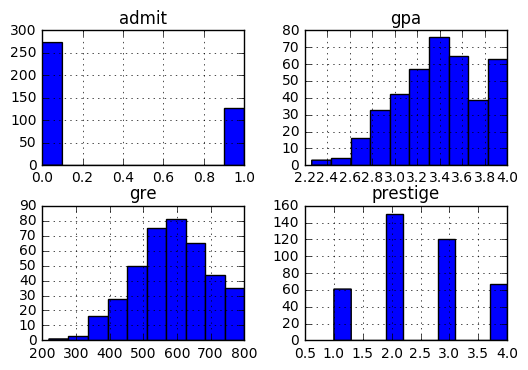

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

admissions_data = pd.read_csv("admissions.csv")

admissions_data.hist()


In [6]:
import pandas as pd
admissions_data = pd.read_csv("admissions.csv")

print pd.crosstab(admissions_data['admit'], admissions_data['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


In [7]:
import pandas as pd
admissions_data = pd.read_csv("admissions.csv")

print pd.crosstab(admissions_data['admit'], admissions_data['gpa'], rownames=['admit'])

gpa    2.26  2.42  2.48  2.52  2.55  2.56  2.62  2.63  2.65  2.67  ...   3.90  \
admit                                                              ...          
0         1     1     1     1     1     1     1     1     0     1  ...      2   
1         0     1     0     0     0     0     1     0     1     1  ...      1   

gpa    3.91  3.92  3.93  3.94  3.95  3.97  3.98  3.99  4.00  
admit                                                        
0         1     2     1     4     1     1     0     2    15  
1         0     0     0     1     4     0     1     1    13  

[2 rows x 132 columns]


In [8]:
import pandas as pd
admissions_data = pd.read_csv("admissions.csv")

print pd.crosstab(admissions_data['admit'], admissions_data['gre'], rownames=['admit'])

gre    220.0  300.0  340.0  360.0  380.0  400.0  420.0  440.0  460.0  480.0  \
admit                                                                         
0          1      2      3      4      8      9      7      8      9     10   
1          0      1      1      0      0      2      0      2      4      6   

gre    ...    620.0  640.0  660.0  680.0  700.0  720.0  740.0  760.0  780.0  \
admit  ...                                                                    
0      ...       18     16     12     11     17      8      7      1      1   
1      ...       12      5     12      9      5      3      4      4      4   

gre    800.0  
admit         
0         14  
1         11  

[2 rows x 26 columns]


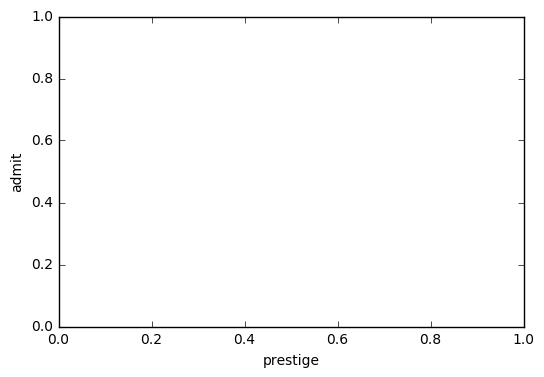

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

admissions_data = pd.read_csv("admissions.csv")

plt.ylabel('admit')
plt.xlabel('prestige')

plt.show()
